# Homework 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from func import Func

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

---
## Exercise 5.9


<img src="figures/homework-04/exercise-5.9.png" width="600" />


In [2]:
x1, x2 = sy.symbols('x1, x2', real=True)

f1 = x1**2 - x2**2 - 12
f2 = 2 * x1 * x2 - 16

sy.nonlinsolve([f1, f2], [x1, x2])

We see that the $f_1$ and $f_2$ intersect at points $(-4, -2)$ and $(4, 2)$

Text(0.5, 1.0, 'Sketch of the level sets and intersection points')

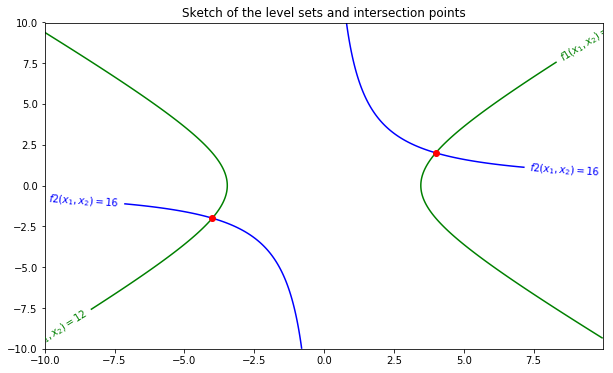

In [3]:
delta = 0.025
x1 = np.arange(-10.0, 10.0, delta)
x2 = np.arange(-10.0, 10.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z1 = X1**2 - X2**2
Z2 = 2 * X1 * X2

fig, ax = plt.subplots(figsize=(10,6))
conourSet1 = ax.contour(X1, X2, Z1, [12], colors='green')
conourSet2 = ax.contour(X1, X2, Z2, [16], colors='blue')
ax.clabel(conourSet1, inline=1, fontsize=10, colors='green', fmt='$f1(x_1,x_2)=12$')
ax.clabel(conourSet2, inline=1, fontsize=10, colors='blue', fmt='$f2(x_1,x_2)=16$')
ax.plot(4, 2, 'ro')
ax.plot(-4, -2, 'ro')

ax.set_title('Sketch of the level sets and intersection points')

---
## Exercise 5.10a and 5.10b

<img src="figures/homework-04/exercise-5.10.png" width="600" />


Taylor series in one dimension.

\begin{align*}
f \left( x \right) & = \sum\limits_{n = 0}^\infty {\frac{{{f^{\left( n \right)}}\left( x_0 \right)}}{{n!}}{{\left( {x - x_0} \right)}^n}} \\ & = f\left( x_0 \right) + f'\left( x_0 \right)\left( {x - x_0} \right) + \frac{{f''\left( x_0 \right)}}{{2!}}{\left( {x - x_0} \right)^2} + \frac{{f'''\left( x_0 \right)}}{{3!}}{\left( {x - x_0} \right)^3} + \cdots \end{align*}

Multivariable Taylor series:

\begin{align*}
   f(x) \approx f(x_0) + Df(x_0) (x-x_0)
   +  \frac{1}{2} (x-x_0)^T D^2 f(x_0) (x-x_0)
   + \dots
\end{align*}

In [4]:
def create_f510a():
    x1, x2 = sy.symbols('x1, x2', real=True)
    f = x1 * sy.exp(-x2) + x2 + 1
    return Func(f, (x1, x2))

f510a = create_f510a()
result = f510a.taylor((1, 0))
result

⎡     x₂⋅(x₁ - 1)      ⎛  x₁   x₂   1⎞    ⎤
⎢x₁ - ─────────── + x₂⋅⎜- ── + ── + ─⎟ + 1⎥
⎣          2           ⎝  2    2    2⎠    ⎦

In [5]:
sy.simplify(result)

⎡                2         ⎤
⎢              x₂          ⎥
⎢-x₁⋅x₂ + x₁ + ─── + x₂ + 1⎥
⎣               2          ⎦

How to solve it in MatLAB:

```
syms x1 x2;
f = x1 * exp(-x2) + x2 + 1;
taylor(f, [x1, x2], [1, 0], 'Order', 3)

ans =
 
x2^2/2 + (1 - x1)*x2 + x1 + 1
```

MatLAB produces:

In [6]:
x1, x2 = sy.symbols('x1, x2')
x2**2/2 + (1 - x1)*x2 + x1 + 1

---
## Exercise 5.10 b)
Let us compute b) 

<img src="figures/homework-04/exercise-5.10.png" width="600" />


In [7]:
def create_f510b():
    x1, x2 = sy.symbols('x1, x2', real=True)
    f = x1**4 +  2 * x1**2 * x2**2 + x2**4
    return Func(f, (x1, x2))

f510b = create_f510b()
result = f510b.taylor((1, 1))
result

[8⋅x₁ + 8⋅x₂ + (x₁ - 1)⋅(8⋅x₁ + 4⋅x₂ - 12) + (x₂ - 1)⋅(4⋅x₁ + 8⋅x₂ - 12) - 12]

In [8]:
sy.simplify(result)

⎡    2                         2             ⎤
⎣8⋅x₁  + 8⋅x₁⋅x₂ - 16⋅x₁ + 8⋅x₂  - 16⋅x₂ + 12⎦

---
## Exercise 6.3

<img src="figures/homework-04/exercise-6.3.png" width="600" />


First we need some definitions:

<img src="figures/homework-04/definition-6.1-minimizer.png" width="600" />


Basically, a **local minimiser** is a point $x \in \Omega$ where $f(x)$ is lowest over a small neighbourhood $\epsilon$ around the point $x$. A **global minimiser** is a point $x \in \Omega$ where $f(x)$ is smallest over all $x \in \Omega$. The following figure illustrates the difference:

<img src="figures/homework-04/figure-6.1-minimizers.png" width="600" />


We are given two facts:

1. $x^{*} \in \Omega$ is a global minimiser. According to the definition, this means that $f(x^{*}) \leq f(x)$ for all $x \in \Omega \backslash \{ x^{*} \}$.
2. We are also told that $x^{*}$ is in $\Omega'$ which is a subset of $\Omega$

We are asked to prove that $x^{*}$ is a global minimiser over $\Omega'$. 

For $x^{*}$ to be a global minimiser over $\Omega'$, we need to show that $f(x^{*}) \leq f(x)$ for all $x \in \Omega' \backslash \{ x^{*}\}$. Any point $x \in \Omega'$ is also in $\Omega$. Since $x^{*}$ is a global minimiser over the larger set $\Omega$, so is $x^{*}$ a global minimiser over the smaller subset $\Omega'$

---
## Exercise 6.8

<img src="figures/homework-04/exercise-6.8.png" width="400" />


<img src="figures/homework-04/exercise-6.8-a.png" width="600" />


In [9]:
A = [[1, 2],
     [4, 7]]
b = [3, 5]
c = 6

f68 = Func.create_quadratic(A, b, c)
f68

[x₁⋅(x₁ + 4⋅x₂) + 3⋅x₁ + x₂⋅(2⋅x₁ + 7⋅x₂) + 5⋅x₂ + 6]

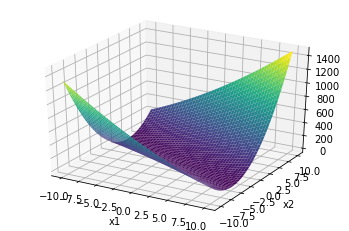

In [10]:
f68.plot()

In [11]:
f68.gradient_at([1, 1])

⎡11⎤
⎢  ⎥
⎣25⎦

In [12]:
f68.hessian_at([1, 1])

⎡2  6 ⎤
⎢     ⎥
⎣6  14⎦

---

<img src="figures/homework-04/exercise-6.8-b.png" width="600" />


The directional derivative of a function $f$ in the direction of the vector $d$ is given:

\begin{equation}
\frac{\partial f}{\partial d}(x) = Df(x)^T d
\end{equation}

The direction of maximal rate of increase is the direction of the gradient at point $[1, 1]^T$ i.e., $\nabla f([1,1]^T)$. 

A unit vector in the direction of the maximal rate of increase can be computed as follows:

$$
\frac{\nabla f(\mathbf{x})}{\lVert \nabla f(\mathbf{x}) \rVert}
$$

Combing the two equations we get:

$$
\left(  \frac{\nabla f(\mathbf{x})}{\lVert \nabla f(\mathbf{x}) \rVert} \right)^T
\nabla f(\mathbf{x}) = \frac   {(\nabla f(\mathbf{x}))^T \nabla f(\mathbf{x})}   {\lVert \nabla f(\mathbf{x}) \rVert} = \lVert \nabla f(\mathbf{x}) \rVert
$$


In [13]:
g = f68.gradient_at([1,1])
g_arr = np.array(g).astype(np.float64)
np.linalg.norm(g_arr)

In [14]:
g.norm()

In [15]:
np.sqrt(746)

---
<img src="figures/homework-04/exercise-6.8-c.png" width="600" />


The FONC theorem states:

<img src="figures/homework-04/theorem-fonc.png" width="600" />


When a point $x'$ is in the interior of the **feasible set** i.e. not at the border then any direction is feasible. 

<img src="figures/homework-04/figure-6.2-feasible-direction.png" width="600" />

The grey area $\Omega$ is called the **feasible set**:

We could let $d=[1,1]$ and solve the equation $d^T \triangledown f(x^{*}) = 0$. Alternatively, we can employ Corollary 6.1:

<img src="figures/homework-04/corollary-6.1-fonc-interior-case.png" width="600" />


We can use SymPy to solve the equation:

In [16]:
# sy.nonlinsolve(f68.gradient(), f68._x)
f68.fonc_points()

In [17]:
x = (3/2, -1)
x

The point where the gradient is zero is $x=[3/2, -1]$. Next we need to determine whether this point satisfies the SONC for a minimizer.

<img src="figures/homework-04/theorem-sonc.png" width="600" />

Since we are working with the interior case, we employ the corollary:

<img src="figures/homework-04/corollary-6.2-sonc-interior-case.png" width="600" />


Corollary 6.2 says that if a point $x^{*}$ statisfies the FONC then that point satisifies the SONC if the Hessian $F(x^{*})$ is **positive semidefinite**.

<img src="figures/homework-04/definition-positive-definite-matrix.png" width="600" />




A matrix $A$ is positive semidefinite if its determant is equal to or larger than zero. 

So if the Hessian is zero or positive then it satisfies the SONC.

In [18]:
f68.hessian_at(x).det()

Since the $\det(F(\mathbf{x})) = -8$ then it is not positive semidefinite. This means that the point $x=[3/2, -1]$ does not satisfy the SONC.

We could also compute the eigenvalues and determine if all eigenvalues are larger than or equal to zero.

In [19]:
f68._hessian.eigenvals()

---
## Exercise 6.10

<img src="figures/homework-04/exercise-6.10.png" width="600" />


---
<img src="figures/homework-04/exercise-6.10-a.png" width="600" />


In [20]:
A = [[2, 5],
     [-1, 1]]
b = [3, 4]
c = 7

f610 = Func.create_quadratic(A, b, c)
f610

[x₁⋅(2⋅x₁ - x₂) + 3⋅x₁ + x₂⋅(5⋅x₁ + x₂) + 4⋅x₂ + 7]

We can find the derivative at $[0, 1]$ as follows:

In [21]:
f610.gradient_at([0, 1])

⎡7⎤
⎢ ⎥
⎣6⎦

The directional derivative of a function $f$ in the direction of the vector $d$ is given:

\begin{equation}
\frac{\partial f}{\partial d}(x) = Df(x)^T d
\end{equation}

We need to take the dot product of the gradient which is $[7, 6]^T$ with the directional vector $[1, 0]^T$. 

In [22]:
np.dot([7, 6], [1, 0])

7

The result is $7$.

---
<img src="figures/homework-04/exercise-6.10-b.png" width="600" />


We need to solve the equation $\triangledown f(x^{*}) = 0$ for $x^{*}$.

In [23]:
# sy.nonlinsolve(f610.gradient(), f610._x)
f610.fonc_points()

The SONC says that this point $x^{*} = [-5/4, 1/2]$ is a minimiser if the Hessian $F(x^{*})$ is positive semidefinite i.e., if the determinant of the  Hessian is equal to or larger than 0; $\det(F(x^{*})) \geq 0$.

In [24]:
x_star = list(f610.fonc_points())[0]
x_star

In [25]:
f610.satisfies_sonc(x_star)

In [26]:
f610.hessian_at(x_star).det()

The function $f$ does not have a minimizer because it does not satisfy the SONC as the Hessian is not positive semidefinite!

Further, by computing the eigenvalues of the Hessian, we can determine if the point is a saddle point:

In [27]:
f610.hessian_at(x_star).eigenvals()

Since the eigenvalues include both positive and negative value, the point $\mathbf{x}^{*}$ is a saddle point.

---
## Exercise 6.11

<img src="figures/homework-04/exercise-6.11.png" width="600" />


In [28]:
def create_f611():
    x1, x2 = sy.symbols('x1, x2', real=True)
    f = -x2**2 + (x1-x1)
    return Func(f, (x1, x2))
f611 = create_f611()

---
<img src="figures/homework-04/exercise-6.11-a.png" width="600" />


First, we need to compute the gradient at the given point:

In [29]:
f611.gradient_at([0, 0])

⎡0⎤
⎢ ⎥
⎣0⎦

The gradient is the zero vector. This means that $d^T \mathbf{0}$ will always be $0$. Therefore, the point $[0, 0]^T$ satisfies the FONC.

---
<img src="figures/homework-04/exercise-6.11-b.png" width="600" />


First, we need to establish if the point satisfies the SONC i.e., the Hessian is positive semidefinite:

In [30]:
# f611.hessian_at([0, 0]).det() >= 0
f611.satisfies_sonc([0, 0])

Next, we need the definitions of minimisers and maximisers:

<img src="figures/homework-04/definition-6.1-minimizer.png" width="600" />


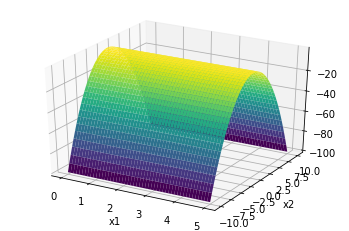

In [31]:
f611.plot(range_x=(0, 5))

Let $f(x_1, x_2) = -x_2^2$ where $x_1 \geq 0$ and $|x_2| \leq x_1^2$ i.e., $x_2 \in [-x_1^2, x_1^2 ] $. 

We need to answer following questions:

- Is $f$ a local minimiser at point $[0, 0]^T$? No! Evaluating $f$ at the given point yields $f(0,0)=0$. Any other feasible point in the neighbourhood of the point $[0, 0]^T$ will yield a negative value i.e., a smaller value. E.g. $f(1,1)=f(1, -1)= -1$. In general, the feasible set is $[x_1, x_1^2]$ where $x_1 \geq 0$. If we evaluate $f$ at the feasible set $f(x_1, x_1^2) = -(x_1^2)^2 = - x_1^4$. This means that $f$ will always yield a negative value, which is smaller than $f(0,0)=0$. Therefore, $[0, 0]^T$ cannot be a minimiser.

- Is $f$ a strict local minimiser at point $[0, 0]^T$? No, because the point is not even a minimizer.

- Is $f$ a global minimiser at point $[0, 0]^T$? Yes, the point $[0,0]^T$ is a global minimiser since any point $x$ in the feasible set yields $f(x) \leq 0$.

- Is $f$ a strict global minimiser at point $[0, 0]^T$? No! If the point $[0,0]^T$ is a strict global minimiser then it must the only point that yields the maximum value. However, this is not true. Consider $f(1, 0)=f(2, 0) = 0$. Essentially, all points of the form $[x_1, 0]$ where $x_1 \geq 0$ will yield $0$. 

---
## Exercise 6.20


<img src="figures/homework-04/exercise-6.20-figure.png" width="600" />

<img src="figures/homework-04/exercise-6.20.png" width="600" />


The energy of the heartbeat signal is given by $1/d^2$ where $d$ is the distance from the source (heart) to the sensor. 

The distance between the sensor located at $x$ and the baby's heart $d_{baby}$ can be computed using Pythogoriam theorem: $d_{baby}^2 = 1^2 + x^2$. 

The energy of the baby's heartbeat signal is: $E_{baby} = 1/d_{baby} = \frac{1}{1 + x^2}$

Similarly, the distance between the sensor and the mother's heart $d_{mother}$ is: $d_{mother}^2 = 1^2 + (2-x)^2$

The energy of the baby's heartbeat signal is: $E_{mother} = 1/d_{mother} = \frac{1}{1 + (2-x)^2}$

The signal-to-interference ratio is given by $\frac{E_{baby}}{E_{mother}}$:

\begin{equation}
\frac{E_{baby}}{E_{mother}} 
= \frac{1/(1 + x^2)}{1/(1 + (2-x)^2)}
= \frac{1 + (2-x)^2}{1 + x^2}
\end{equation}

Our objective function is therefore:

\begin{equation}
f(x) = \frac{1 + (2-x)^2}{1 + x^2}
\end{equation}


In [32]:
def create_f620():
    x = sy.symbols('x', real=True)
    f = (1 + (2-x)**2) / (1 + x**2)
    return f, x
f620, x620 = create_f620()

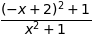

In [33]:
f620

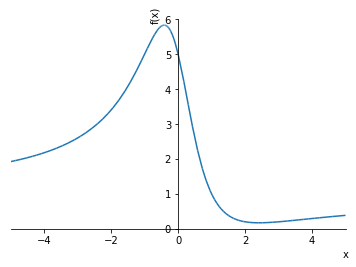

In [34]:
sy.plot(f620, (x620, -5, 5))

From the plot, we can see there are two extrema; a minimum when $x$ is around $2$ and a maximum when $x$ is around $-1$. We can find the exact $x$ values by solving solving the $\triangledown f(x) = 0$ for $x$. This gives us:

In [35]:
# Find points that satisfies the FONC
solution = sy.nonlinsolve([f620.diff()], (x620,))
solution

We can evaluate these two $x$ values to find the $x$ value that yields maximum $f(x)$.

In [36]:
s1, s2 = solution
r1, r2 = (
    f620.evalf(subs={ x620 : s1[0] }),
    f620.evalf(subs={ x620 : s2[0] }),
)

$f \left( 1+\sqrt{2} \right)$ and $f \left( -\sqrt{2} + 1 \right) $ yield:

In [37]:
r1, r2

So, the position of the sensor that maximises the signal-to-interference ratio is $x=-\sqrt{2} + 1$

---
## Exercise 6.23

<img src="figures/homework-04/exercise-6.23.png" width="600" />


In [38]:
def create_f623():
    x1, x2 = sy.symbols('x1, x2')
    f = (x1 - x2)**4  +  x1**2  - x2**2  -  2*x1  +  2*x2  +  1
    return Func(f, (x1, x2))
f623 = create_f623()

To find points that satifies the FONC, we run our utility function:

In [39]:
f623.fonc_points()

So the point $[1, 1]^T$ satisfies the FONC. Let us determine whether this point satisfies the SONC:

In [40]:
f623.satisfies_sonc([1, 1])